In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
train = pd.read_csv('bus_train.csv', encoding = 'utf-8')
test = pd.read_csv('bus_test.csv',sep=',')
train.tail(5)

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
210452,210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,21시,528.0,삼아아파트,33.251896,126.574417,96
210453,210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,21시,280.0,매일올레시장 7번입구,33.249753,126.565959,50
210454,210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,21시,114.0,아랑조을거리 입구,33.251084,126.559551,16
210455,210455,2019-10-28,405328102,7983486,281-2,33.251084,126.559551,아랑조을거리 입구,21시,223.0,평생학습관,33.249504,126.558068,38
210456,210456,2019-10-28,405328102,7983486,281-2,33.248487,126.511195,대륜동주민센터,21시,189.0,서귀포버스터미널(가상정류소),33.249091,126.509224,24


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210457 entries, 0 to 210456
Data columns (total 14 columns):
id                  210457 non-null int64
date                210457 non-null object
route_id            210457 non-null int64
vh_id               210457 non-null int64
route_nm            210457 non-null object
now_latitude        210457 non-null float64
now_longitude       210457 non-null float64
now_station         210457 non-null object
now_arrive_time     210457 non-null object
distance            210457 non-null float64
next_station        210457 non-null object
next_latitude       210457 non-null float64
next_longitude      210457 non-null float64
next_arrive_time    210457 non-null int64
dtypes: float64(5), int64(4), object(5)
memory usage: 22.5+ MB


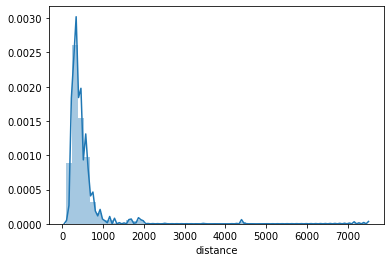

In [3]:
sns.distplot(train['distance'])

C:\Users\jihye\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jihye\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jihye\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jihye\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jihye\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jihye\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46384 missing from c

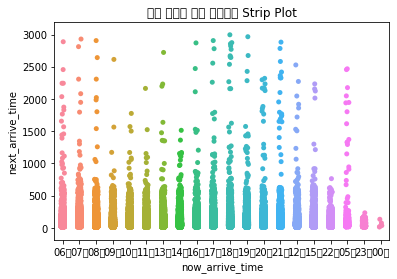

In [4]:
sns.stripplot(x="now_arrive_time", y="next_arrive_time", data=train, jitter=True)
plt.title("출발 시간에 따른 도착시간 Strip Plot")
plt.show()

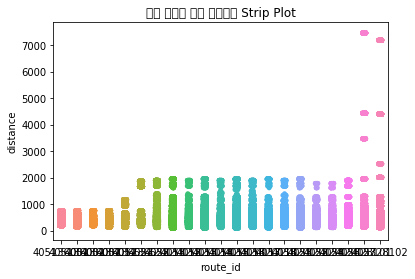

In [5]:
sns.stripplot(x="route_id", y="distance", data=train, jitter=True)
plt.title("출발 시간에 따른 도착시간 Strip Plot")
plt.show()

In [6]:
train['arrive_hour'] = train['now_arrive_time'].str.replace(pat='시', repl='', regex=False)
train.astype({'next_arrive_time':'float'})
train.head()

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time,arrive_hour
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24,06
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36,06
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40,06
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42,06
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64,07


In [7]:
# arrive_hour 원핫인코딩
train_one = pd.get_dummies(train, columns=['arrive_hour'])

In [8]:
# next_arrive_time 이상치 데이터 제거

drop_index = train_one [train_one ['next_arrive_time'] > 1000].index
print('이상치 개수: ', len(drop_index))
train_one .drop(drop_index, axis=0, inplace=True)
train_one .reset_index(drop=True, inplace=True)

# distance 이상치 데이터 제거

drop_index = train_one [train_one ['distance'] > 1600].index
print('이상치 개수: ', len(drop_index))
train_one .drop(drop_index, axis=0, inplace=True)
train_one .reset_index(drop=True, inplace=True)

이상치 개수:  200
이상치 개수:  5854


In [9]:
train_df =  train_one.drop(['id','route_id','vh_id','next_station','now_station', 'date', 'now_arrive_time'],axis=1,inplace=False)
train_df.head()

,route_nm,now_latitude,now_longitude,distance,next_latitude,next_longitude,next_arrive_time,arrive_hour_00,arrive_hour_05,arrive_hour_06,...,arrive_hour_14,arrive_hour_15,arrive_hour_16,arrive_hour_17,arrive_hour_18,arrive_hour_19,arrive_hour_20,arrive_hour_21,arrive_hour_22,arrive_hour_23
0,360-1,33.456267,126.551750,266.0,33.457724,126.554014,24,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,360-1,33.457724,126.554014,333.0,33.458783,126.557353,36,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,360-1,33.458783,126.557353,415.0,33.459893,126.561624,40,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,360-1,33.479705,126.543811,578.0,33.484860,126.542928,42,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,360-1,33.485662,126.494923,374.0,33.485822,126.490897,64,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
train_df['route_nm'].value_counts() #365,281,360,201 4가지 원핫인코딩 가능

365-22    30063
281-2     24665
360-1     21665
281-1     18265
201-16    15104
201-14    12726
365-21    11759
201-12    11623
360-12     7989
201-11     7690
360-2      7675
201-22     7545
201-27     5692
201-17     4978
201-26     2636
201-21     2601
201-13     2576
201-18     2506
201-24     2349
201-15     2226
360-7      2070
Name: route_nm, dtype: int64

In [11]:
# 현재 위도, 경도 칼럼만 추출하여 DataFrame만들기
train_now_df = train_df.loc[:, ['now_longitude', 'now_latitude']]
train_now_df.tail()

,now_longitude,now_latitude
204398,126.577450,33.255783
204399,126.568527,33.248595
204400,126.560303,33.251891
204401,126.559551,33.251084
204402,126.511195,33.248487


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_now_df)
train_now_scaled = scaler.transform(train_now_df)

train_now_df_scaled = pd.DataFrame(data = train_now_scaled, columns =['now_longitude', 'now_latitude'] )
train_now_df_scaled.head()

,now_longitude,now_latitude
0,-0.409593,0.214646
1,-0.391121,0.228785
2,-0.363877,0.239061
3,-0.474369,0.442093
4,-0.873254,0.499901


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler2 = MinMaxScaler()
scaler2.fit(train_now_df)
train_now_scaled2 = scaler2.transform(train_now_df)

train_now_df_scaled2 = pd.DataFrame(data = train_now_scaled2, columns =['now_longitude', 'now_latitude'] )
train_now_df_scaled2.head()

In [13]:
from sklearn.cluster import KMeans

# K-Means 클러스터링 수행
kmeans = KMeans(n_clusters = 8, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(train_now_df_scaled)

KMeans(random_state=0)

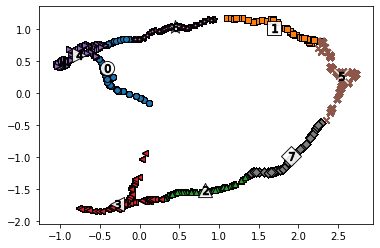

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

train_now_df_scaled['cluster'] = kmeans.labels_

# cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(kmeans.labels_)
markers = ['o', 's', '^', '<', '>', 'x', '*', 'D','+']

# 군집된 label 유형별로 scatter plot시행
for label in unique_labels:
    label_cluster = train_now_df_scaled[train_now_df_scaled['cluster']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['now_longitude'], y=label_cluster['now_latitude'], edgecolor='k', marker=markers[label])

    # 군집별 중심위치
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
plt.show()

In [15]:
# 위도, 경도로 군집화 한 결과를 원본 데이터 컬럼에 추가
train_df['cluster'] = train_now_df_scaled['cluster']
train_df.tail()

,route_nm,now_latitude,now_longitude,distance,next_latitude,next_longitude,next_arrive_time,arrive_hour_00,arrive_hour_05,arrive_hour_06,...,arrive_hour_15,arrive_hour_16,arrive_hour_17,arrive_hour_18,arrive_hour_19,arrive_hour_20,arrive_hour_21,arrive_hour_22,arrive_hour_23,cluster
204398,281-2,33.255783,126.577450,528.0,33.251896,126.574417,96,0,0,0,...,0,0,0,0,0,0,1,0,0,3
204399,281-2,33.248595,126.568527,280.0,33.249753,126.565959,50,0,0,0,...,0,0,0,0,0,0,1,0,0,3
204400,281-2,33.251891,126.560303,114.0,33.251084,126.559551,16,0,0,0,...,0,0,0,0,0,0,1,0,0,3
204401,281-2,33.251084,126.559551,223.0,33.249504,126.558068,38,0,0,0,...,0,0,0,0,0,0,1,0,0,3
204402,281-2,33.248487,126.511195,189.0,33.249091,126.509224,24,0,0,0,...,0,0,0,0,0,0,1,0,0,3


In [16]:
train_df.drop(['now_latitude','now_longitude','next_latitude','next_longitude', 'arrive_hour_00'],axis=1,inplace=True)

In [17]:
# route_nm 버스 노선 실제번호 전체로 원핫인코딩
train_3 = pd.get_dummies(train_df, columns=['route_nm'])

In [18]:
train_3.columns


Index(['distance', 'next_arrive_time', 'arrive_hour_05', 'arrive_hour_06',
       'arrive_hour_07', 'arrive_hour_08', 'arrive_hour_09', 'arrive_hour_10',
       'arrive_hour_11', 'arrive_hour_12', 'arrive_hour_13', 'arrive_hour_14',
       'arrive_hour_15', 'arrive_hour_16', 'arrive_hour_17', 'arrive_hour_18',
       'arrive_hour_19', 'arrive_hour_20', 'arrive_hour_21', 'arrive_hour_22',
       'arrive_hour_23', 'cluster', 'route_nm_201-11', 'route_nm_201-12',
       'route_nm_201-13', 'route_nm_201-14', 'route_nm_201-15',
       'route_nm_201-16', 'route_nm_201-17', 'route_nm_201-18',
       'route_nm_201-21', 'route_nm_201-22', 'route_nm_201-24',
       'route_nm_201-26', 'route_nm_201-27', 'route_nm_281-1',
       'route_nm_281-2', 'route_nm_360-1', 'route_nm_360-12', 'route_nm_360-2',
       'route_nm_360-7', 'route_nm_365-21', 'route_nm_365-22'],
      dtype='object')

In [19]:
# route 앞에 id만 뽑기
train_df['route'] = train_df['route_nm'].str.split('-').str[0]


In [20]:
# route_nm 버스 노선 앞 id만으로 원핫인코딩
train_4 = pd.get_dummies(train_df, columns=['route'])
train_4.drop(['route_nm'],axis=1,inplace=True)
train_4.head()

,distance,next_arrive_time,arrive_hour_05,arrive_hour_06,arrive_hour_07,arrive_hour_08,arrive_hour_09,arrive_hour_10,arrive_hour_11,arrive_hour_12,...,arrive_hour_19,arrive_hour_20,arrive_hour_21,arrive_hour_22,arrive_hour_23,cluster,route_201,route_281,route_360,route_365
0,266.0,24,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,333.0,36,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,415.0,40,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,578.0,42,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,374.0,64,0,0,1,0,0,0,0,0,...,0,0,0,0,0,4,0,0,1,0


In [21]:
train_4.columns

Index(['distance', 'next_arrive_time', 'arrive_hour_05', 'arrive_hour_06',
       'arrive_hour_07', 'arrive_hour_08', 'arrive_hour_09', 'arrive_hour_10',
       'arrive_hour_11', 'arrive_hour_12', 'arrive_hour_13', 'arrive_hour_14',
       'arrive_hour_15', 'arrive_hour_16', 'arrive_hour_17', 'arrive_hour_18',
       'arrive_hour_19', 'arrive_hour_20', 'arrive_hour_21', 'arrive_hour_22',
       'arrive_hour_23', 'cluster', 'route_201', 'route_281', 'route_360',
       'route_365'],
      dtype='object')

In [22]:
train_3.dtypes

distance            float64
next_arrive_time      int64
arrive_hour_05        uint8
arrive_hour_06        uint8
arrive_hour_07        uint8
arrive_hour_08        uint8
arrive_hour_09        uint8
arrive_hour_10        uint8
arrive_hour_11        uint8
arrive_hour_12        uint8
arrive_hour_13        uint8
arrive_hour_14        uint8
arrive_hour_15        uint8
arrive_hour_16        uint8
arrive_hour_17        uint8
arrive_hour_18        uint8
arrive_hour_19        uint8
arrive_hour_20        uint8
arrive_hour_21        uint8
arrive_hour_22        uint8
arrive_hour_23        uint8
cluster               int32
route_nm_201-11       uint8
route_nm_201-12       uint8
route_nm_201-13       uint8
route_nm_201-14       uint8
route_nm_201-15       uint8
route_nm_201-16       uint8
route_nm_201-17       uint8
route_nm_201-18       uint8
route_nm_201-21       uint8
route_nm_201-22       uint8
route_nm_201-24       uint8
route_nm_201-26       uint8
route_nm_201-27       uint8
route_nm_281-1      

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# log 값 변환 시 NaN 등의 이슈로 log()가 아닌 log1p()를 이용해 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_squared_error()를 이용해 RMSE 계산
def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

# MAE, RMSE, RMSLE를 모두 계산
def evaluate_regr(y, pred):
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    # MAE는 사이킷런의 mean_absolute_error()로 계산
    mae_val = mean_absolute_error(y, pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3f}, MAE: {2:.3f}'.format(rmsle_val, rmse_val, mae_val))

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = train_3['next_arrive_time']
X_features = train_3.drop(['next_arrive_time'],axis=1,inplace=False) # inplace=False 주의

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test, pred)

RMSLE: 0.513, RMSE: 48.535, MAE: 32.668


In [25]:
# 테스트 데이터 전처리 해주기, 예측값 생성하기

In [26]:
test['arrive_hour'] = test['now_arrive_time'].str.replace(pat='시', repl='', regex=False)
test.head()

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,arrive_hour
0,210457,2019-10-29,405136001,7997025,360-1,33.457724,126.554014,제대마을,07시,333.0,제대아파트,33.458783,126.557353,07
1,210458,2019-10-29,405136001,7997025,360-1,33.458783,126.557353,제대아파트,07시,415.0,제주대학교,33.459893,126.561624,07
2,210459,2019-10-29,405136001,7997025,360-1,33.478867,126.483833,한라중학교/부영아파트,08시,417.0,대림2차아파트,33.478850,126.488350,08
3,210460,2019-10-29,405136001,7997025,360-1,33.478850,126.488350,대림2차아파트,08시,334.0,연동대림1차아파트,33.480700,126.489933,08
4,210461,2019-10-29,405136001,7997025,360-1,33.480700,126.489933,연동대림1차아파트,08시,550.0,케이티앤지,33.482077,126.485355,08


In [27]:
# arrive_hour 원핫인코딩
test_one = pd.get_dummies(test, columns=['arrive_hour'])

In [28]:
test_df =  test_one.drop(['id','route_id','vh_id','next_station','now_station', 'date', 'now_arrive_time'],axis=1,inplace=False)
test_df.head()

,route_nm,now_latitude,now_longitude,distance,next_latitude,next_longitude,arrive_hour_05,arrive_hour_06,arrive_hour_07,arrive_hour_08,...,arrive_hour_14,arrive_hour_15,arrive_hour_16,arrive_hour_17,arrive_hour_18,arrive_hour_19,arrive_hour_20,arrive_hour_21,arrive_hour_22,arrive_hour_23
0,360-1,33.457724,126.554014,333.0,33.458783,126.557353,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,360-1,33.458783,126.557353,415.0,33.459893,126.561624,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,360-1,33.478867,126.483833,417.0,33.478850,126.488350,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,360-1,33.478850,126.488350,334.0,33.480700,126.489933,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,360-1,33.480700,126.489933,550.0,33.482077,126.485355,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [29]:
test_now_df = test_df.loc[:, ['now_longitude', 'now_latitude']]
test_now_df.tail()

,now_longitude,now_latitude
91769,126.534764,33.493625
91770,126.532907,33.495540
91771,126.530351,33.498925
91772,126.527103,33.500473
91773,126.521348,33.499916


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_now_df)
test_now_scaled = scaler.transform(test_now_df)

test_now_df_scaled = pd.DataFrame(data = test_now_scaled, columns =['now_longitude', 'now_latitude'] )
test_now_df_scaled.head()

,now_longitude,now_latitude
0,-0.391121,0.228785
1,-0.363877,0.239061
2,-0.963739,0.433961
3,-0.926884,0.433796
4,-0.913968,0.451748


In [31]:
from sklearn.cluster import KMeans

# K-Means 클러스터링 수행
kmeans = KMeans(n_clusters = 8, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(test_now_df_scaled)

KMeans(random_state=0)

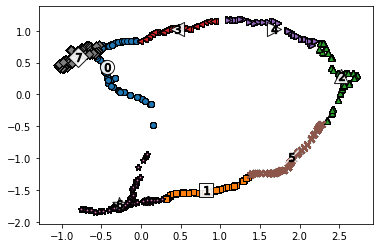

In [32]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

test_now_df_scaled['cluster'] = kmeans.labels_

# cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(kmeans.labels_)
markers = ['o', 's', '^', '<', '>', 'x', '*', 'D','+']

# 군집된 label 유형별로 scatter plot시행
for label in unique_labels:
    label_cluster = test_now_df_scaled[test_now_df_scaled['cluster']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['now_longitude'], y=label_cluster['now_latitude'], edgecolor='k', marker=markers[label])

    # 군집별 중심위치
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
plt.show()

In [33]:
test_df['cluster'] = test_now_df_scaled['cluster']
test_df.drop(['now_latitude','now_longitude','next_latitude','next_longitude'],axis=1,inplace=True)
test_df.tail()

,route_nm,distance,arrive_hour_05,arrive_hour_06,arrive_hour_07,arrive_hour_08,arrive_hour_09,arrive_hour_10,arrive_hour_11,arrive_hour_12,...,arrive_hour_15,arrive_hour_16,arrive_hour_17,arrive_hour_18,arrive_hour_19,arrive_hour_20,arrive_hour_21,arrive_hour_22,arrive_hour_23,cluster
91769,281-2,272.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
91770,281-2,447.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
91771,281-2,418.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,7
91772,281-2,140.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,7
91773,281-2,541.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,7


In [34]:
test_3 = pd.get_dummies(test_df, columns=['route_nm'])
test_3.columns

Index(['distance', 'arrive_hour_05', 'arrive_hour_06', 'arrive_hour_07',
       'arrive_hour_08', 'arrive_hour_09', 'arrive_hour_10', 'arrive_hour_11',
       'arrive_hour_12', 'arrive_hour_13', 'arrive_hour_14', 'arrive_hour_15',
       'arrive_hour_16', 'arrive_hour_17', 'arrive_hour_18', 'arrive_hour_19',
       'arrive_hour_20', 'arrive_hour_21', 'arrive_hour_22', 'arrive_hour_23',
       'cluster', 'route_nm_201-11', 'route_nm_201-12', 'route_nm_201-13',
       'route_nm_201-14', 'route_nm_201-15', 'route_nm_201-16',
       'route_nm_201-17', 'route_nm_201-18', 'route_nm_201-21',
       'route_nm_201-22', 'route_nm_201-24', 'route_nm_201-26',
       'route_nm_201-27', 'route_nm_281-1', 'route_nm_281-2', 'route_nm_360-1',
       'route_nm_360-12', 'route_nm_360-2', 'route_nm_360-7',
       'route_nm_365-21', 'route_nm_365-22'],
      dtype='object')

In [36]:
pred = lr_reg.predict(test_3)
pred


array([ 77.32378164,  84.41663698, 109.70125979, ...,  83.14425112,
        59.09774157,  93.78353412])

In [39]:
sub = pd.read_csv('bus_submission_제출양식.csv', encoding = 'utf-8')
sub

,id,next_arrive_time
0,210457,0
1,210458,0
2,210459,0
3,210460,0
4,210461,0
...,...,...
91769,302350,0
91770,302351,0
91771,302352,0
91772,302353,0


In [40]:
sub['next_arrive_time'] = pred

In [41]:
sub

,id,next_arrive_time
0,210457,77.323782
1,210458,84.416637
2,210459,109.701260
3,210460,102.521906
4,210461,121.205525
...,...,...
91769,302350,47.916247
91770,302351,63.053439
91771,302352,83.144251
91772,302353,59.097742
